In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('google_playstore_cleaned.csv')

In [3]:
df.head(5)

,App Name,Category,Rating,Rating Count,Installs,Price,Size,Content Rating,Game_genre
0,Gakondo,Adventure,0.0,0.0,0 - 100,0.0,10.0,Everyone,NaN
1,Ampere Battery Info,Tools,4.4,64.0,"5,000 - 10,000",0.0,2.9,Everyone,NaN
2,GROW.me,Tools,0.0,0.0,100 - 500,0.0,6.2,Everyone,NaN
3,IMOCCI,Social,0.0,0.0,0 - 100,0.0,46.0,Teen,NaN
4,Neon 3d Iron Tech Keyboard Theme,Personalization,4.7,820.0,"50,000 - 100,000",0.0,3.5,Everyone,NaN


In [4]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs', 'Price',
       'Size', 'Content Rating', 'Game_genre'],
      dtype='object')

In [5]:
print('This dataset has', df.shape[0], 'apps and', df.shape[1], 'features')

This dataset has 1287191 apps and 9 features


In [6]:
print('Average Rating per Category')
df.groupby('Category')['Rating'].agg(['mean','median'])

Average Rating per Category


,mean,median
Category,,
Action,3.114130,3.9
Adventure,3.258164,4.0
Arcade,2.824923,3.8
Art & Design,2.131997,2.7
Auto & Vehicles,2.129449,2.7
Beauty,1.591601,0.0
Board,3.179130,3.9
Books & Reference,2.604567,3.9
Business,1.522225,0.0


In [7]:
print('Average App Size (Megabytes) per Category')
df.groupby('Category')['Size'].agg(['mean','median'])

Average App Size (Megabytes) per Category


,mean,median
Category,,
Action,46.311533,42.0
Adventure,40.688526,35.0
Arcade,30.630417,26.0
Art & Design,19.541378,11.0
Auto & Vehicles,19.919087,13.0
Beauty,16.523341,11.0
Board,26.650155,21.0
Books & Reference,13.942761,8.2
Business,19.299940,12.0


In [8]:
df.Installs = pd.Categorical(df.Installs, ['0 - 100','100 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '100,000 - 500,000', '500,000 - 1,000,000','1,000,000 - 5,000,000', '5,000,000 - 10,000,000', '10,000,000 - 50,000,000', '50,000,000 - 100,000,000','100,000,000 - 500,000,000', '500,000,000 - 1,000,000,000', '1,000,000,000 - 5,000,000,000', '5,000,000,000+'])
print('Number of Installs per Install Bracket')
print(df.Installs.value_counts().sort_index())

print('Total number of apps', df.Installs.count())

Number of Installs per Install Bracket
0 - 100                          301522
100 - 500                        243612
500 - 1,000                      105841
1,000 - 5,000                    223802
5,000 - 10,000                    82409
10,000 - 50,000                  151615
50,000 - 100,000                  47027
100,000 - 500,000                 73091
500,000 - 1,000,000               19575
1,000,000 - 5,000,000             26239
5,000,000 - 10,000,000             5568
10,000,000 - 50,000,000            5536
50,000,000 - 100,000,000            770
100,000,000 - 500,000,000           483
500,000,000 - 1,000,000,000          51
1,000,000,000 - 5,000,000,000        38
5,000,000,000+                       11
Name: Installs, dtype: int64
Total number of apps 1287190


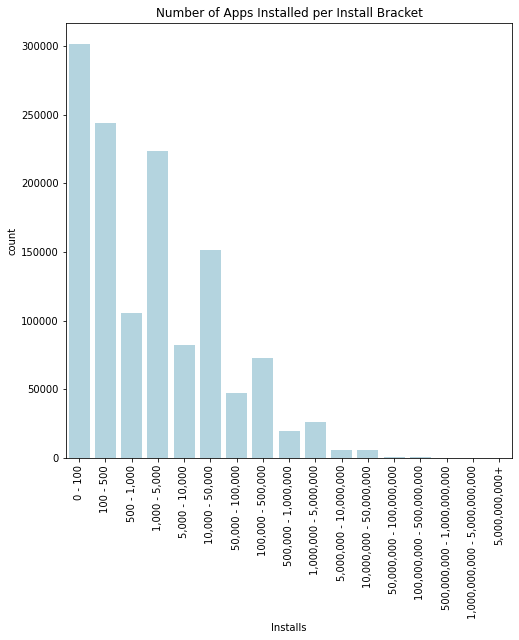

In [9]:
order = ['0 - 100','100 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '100,000 - 500,000', '500,000 - 1,000,000','1,000,000 - 5,000,000', '5,000,000 - 10,000,000', '10,000,000 - 50,000,000', '50,000,000 - 100,000,000','100,000,000 - 500,000,000', '500,000,000 - 1,000,000,000', '1,000,000,000 - 5,000,000,000', '5,000,000,000+']
plt.figure(figsize=(8,8))
a= sns.countplot(x = df.Installs, order = order, data = df, color = 'lightblue')
a.set_title('Number of Apps Installed per Install Bracket')
a.set_xticklabels(a.get_xticklabels(), rotation=90);

Number of Apps per category


Education                  127219
Business                   100311
Music & Audio               87008
Lifestyle                   75017
Tools                       67215
Entertainment               63581
Books & Reference           56515
Health & Fitness            51770
Shopping                    48981
Productivity                46960
Travel & Local              46613
Food & Drink                45773
Finance                     44111
Personalization             37819
Communication               30703
News & Magazines            29320
Sports                      29180
Social                      27164
Puzzle                      25069
Casual                      21958
Medical                     20260
Arcade                      19925
Photography                 16827
Maps & Navigation           15821
Educational                 13048
Simulation                  12569
Action                      12385
Auto & Vehicles             10744
Adventure                   10295
House & Home  

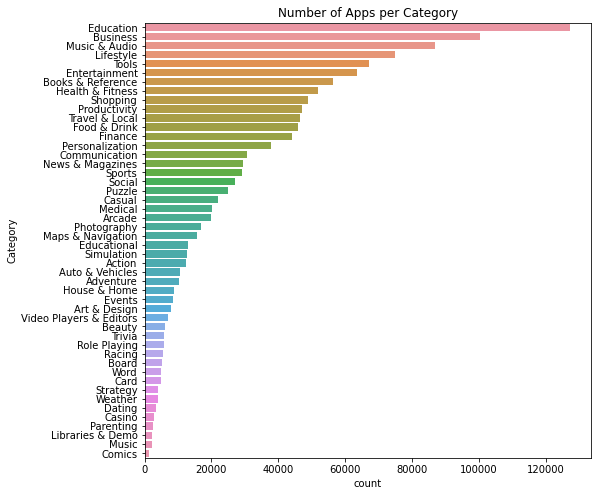

In [10]:
print('Number of Apps per category')
display(df.Category.value_counts())
fig=plt.figure(figsize=(8, 8))
a = sns.countplot(y = df.Category,order = df.Category.value_counts().index, data = df).set_title('Number of Apps per Category')

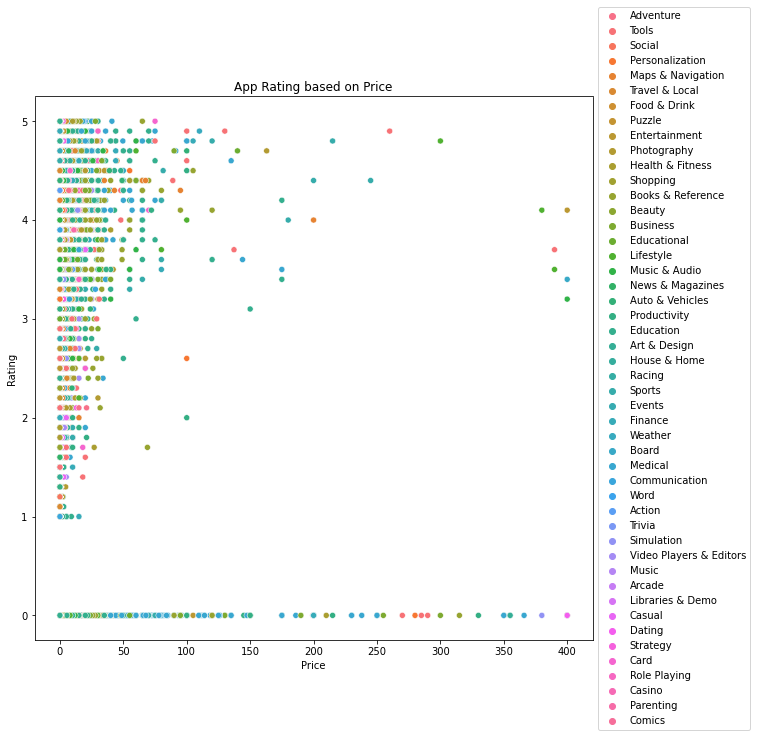

In [11]:
#Rating of Apps based on their Pricing Model
plt.figure(figsize=(10,10))
g = sns.scatterplot(y = 'Rating', x = 'Price',hue = 'Category', data = df)
g.set_title('App Rating based on Price')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

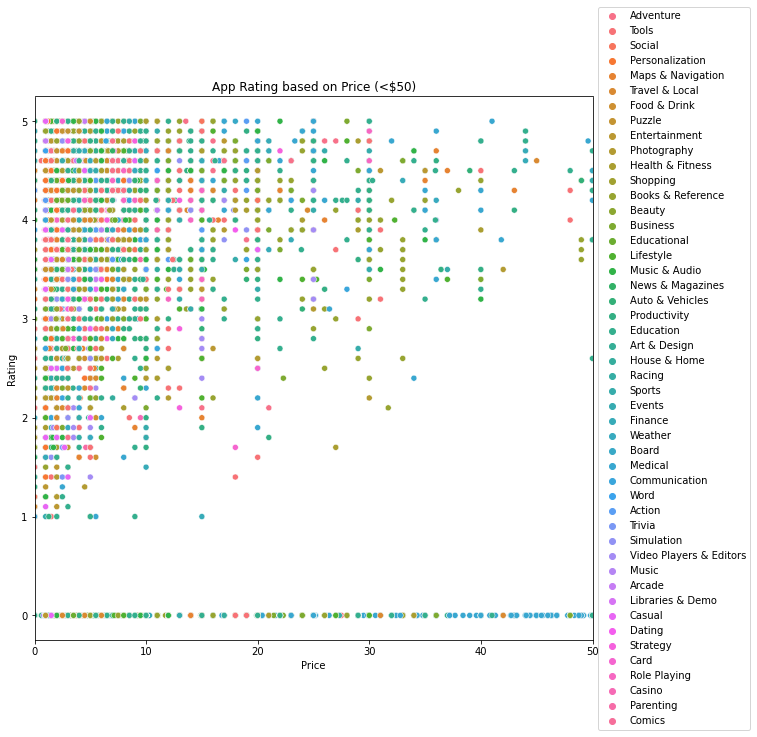

In [12]:
#Rating of Apps based on their Pricing Model (<$50)
plt.figure(figsize=(10,10))
g = sns.scatterplot(y = 'Rating', x = 'Price',hue = 'Category', data = df)
g.set_title('App Rating based on Price (<$50)')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.set_xlim(0,50);

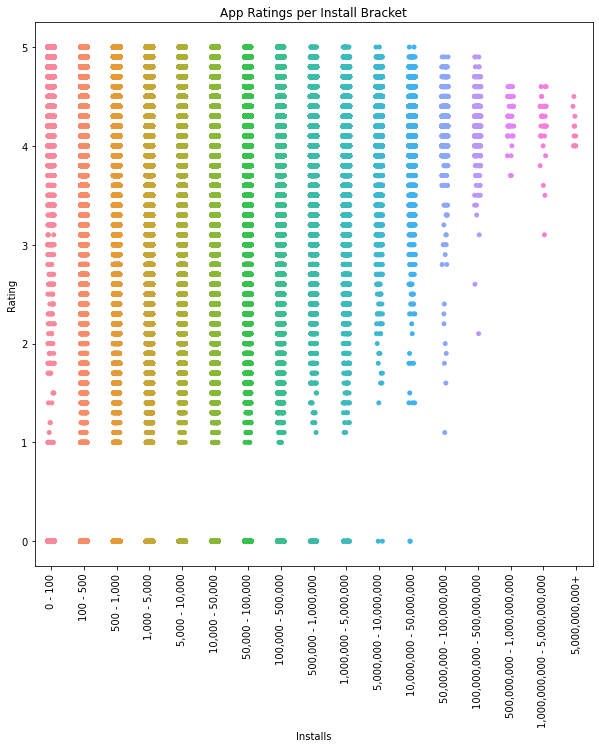

In [13]:
plt.figure(figsize = (10,10))
ax = sns.stripplot(x="Installs", y="Rating", data=df, order = order)
ax.set_title('App Ratings per Install Bracket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

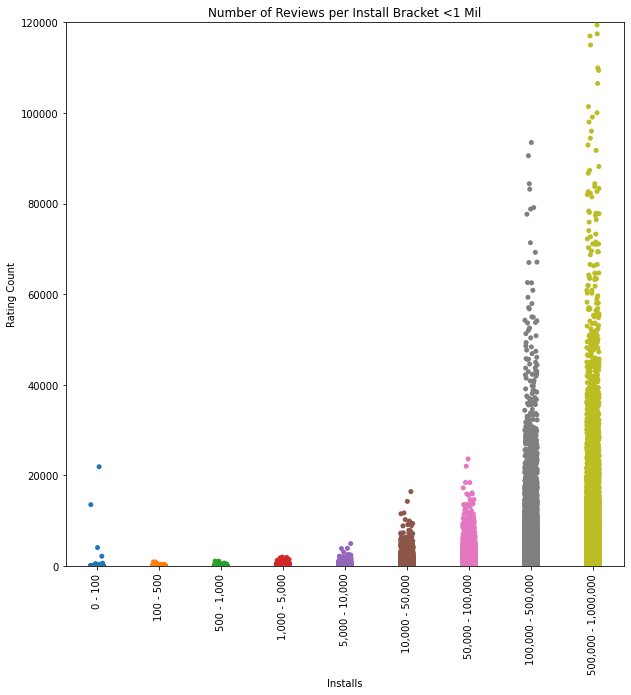

In [14]:
plt.figure(figsize = (10,10))
ax = sns.stripplot(x="Installs", y="Rating Count", data=df[df['Installs'].isin(['0 - 100','100 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '100,000 - 500,000', '500,000 - 1,000,000'])], order = ['0 - 100','100 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '100,000 - 500,000', '500,000 - 1,000,000'])
ax.set_title('Number of Reviews per Install Bracket <1 Mil')
ax.set_ylim(0,120000)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

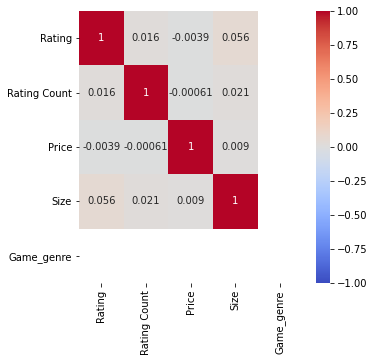

In [15]:
#Correlation matrix to check for multicollinearity - Entire Dataframe
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

Correlation for Top 5 Categories


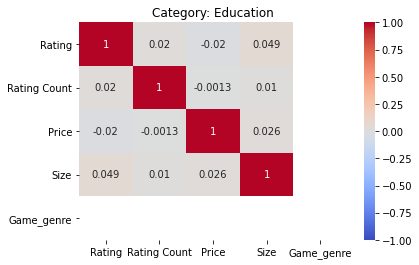

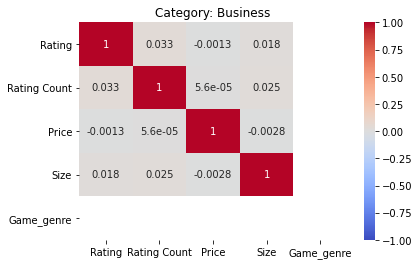

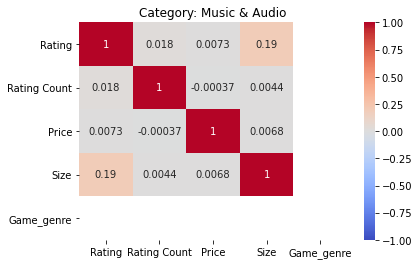

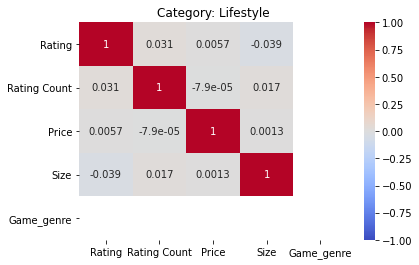

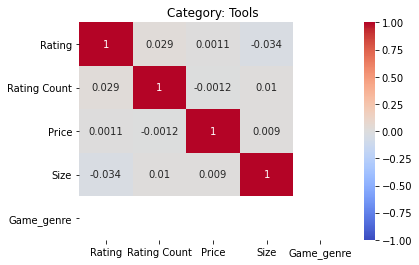

In [16]:
#Correlatioin matrix - Top 5 Categories
print('Correlation for Top 5 Categories')
a = df['Category'].value_counts().index.unique()
top_5 = a[:5]
for x in top_5:
    plt.figure()
    sns.heatmap(df[df['Category'] == x].corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True).set_title('Category: '+x)